In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [2]:
df = pd.read_excel(
'asia index2.xlsx',
    header =1,
)

df = df.rename(columns={'Unnamed: 0':'Date'})
# print(type(df['Date']))
df

,Date,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,2014-01-02,4327.265,1261.71,1852.95,5984.26,3174.65,833.29,504.51
1,2014-01-03,4257.663,1251.31,1834.74,5947.93,3131.47,829.89,505.37
2,2014-01-06,4202.809,1258.66,1829.18,5985.81,3123.82,837.68,509.10
3,2014-01-07,4175.806,1258.66,1825.11,5947.44,3120.88,861.63,510.12
4,2014-01-08,4200.593,1266.25,1831.30,5986.48,3150.65,859.35,513.90
5,2014-01-09,4201.218,1266.25,1828.21,5937.51,3145.41,860.00,516.98
6,2014-01-10,4254.971,1263.34,1826.61,5842.88,3143.87,858.25,518.94
7,2014-01-13,4390.771,1263.34,1834.97,5940.67,3135.49,880.70,521.11
8,2014-01-15,4441.594,1245.36,1824.03,5958.12,3143.25,871.02,526.68
9,2014-01-16,4412.489,1245.36,1813.01,5982.24,3140.44,888.02,533.54


In [3]:
df.isnull().sum()

Date             0
Indonesia      133
Laos           136
Malaysia       139
Philippines    167
Singapore      100
Thailand       172
Vietnam        128
dtype: int64

In [4]:
df = df.fillna(method='ffill')
# df = df.dropna()
df.isnull().sum()

Date           0
Indonesia      0
Laos           0
Malaysia       0
Philippines    0
Singapore      0
Thailand       0
Vietnam        0
dtype: int64

In [5]:
stat = df.describe()
stat

,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.00000
mean,5536.136718,1063.564384,1728.011381,7516.936692,3169.920498,1021.312320,769.91732
std,637.137830,222.354872,85.417807,555.238089,217.540822,93.383757,186.45646
min,4120.503000,642.950000,1532.140000,5842.880000,2532.700000,761.750000,504.51000
25%,4986.962500,873.535000,1661.800000,7146.330000,3045.862500,950.375000,590.72000
50%,5520.982500,1027.230000,1718.265000,7581.790000,3212.100000,1028.055000,714.81500
75%,6076.733500,1249.860000,1799.170000,7906.707500,3321.787500,1091.550000,962.86250
max,6689.287000,1566.920000,1895.180000,9058.620000,3615.280000,1206.310000,1204.33000


In [6]:
stat.loc['std', 'Indonesia':'Vietnam']


Indonesia      637.137830
Laos           222.354872
Malaysia        85.417807
Philippines    555.238089
Singapore      217.540822
Thailand        93.383757
Vietnam        186.456460
Name: std, dtype: float64

In [7]:
df2 = pd.read_excel(
'kursasean2.xlsx'
)


df2 = df2.fillna(method='ffill')
# df = df.dropna()
df2.isnull().sum()
# df2

Date           0
Indonesia      0
Laos           0
Malaysia       0
Philippines    0
Singapore      0
Thailand       0
Vietnam        0
dtype: int64

In [8]:
df2

,Date,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,2014-01-02,12150.0,8000.00,3.2850,44.470,1.2672,32.95,21060.0
1,2014-01-03,12160.0,8021.00,3.2850,44.690,1.2670,32.99,21075.0
2,2014-01-06,12170.0,8021.00,3.2835,44.540,1.2677,33.05,21080.0
3,2014-01-07,12230.0,8003.00,3.2830,44.800,1.2710,33.05,21075.0
4,2014-01-08,12225.0,8018.00,3.2710,44.680,1.2730,33.03,21080.0
5,2014-01-09,12185.0,8015.00,3.2750,44.600,1.2704,32.99,21075.0
6,2014-01-10,12155.0,8013.00,3.2680,44.550,1.2635,32.96,21072.0
7,2014-01-13,12045.0,8009.00,3.2600,44.590,1.2646,32.95,21060.0
8,2014-01-15,12080.0,7991.00,3.2860,45.100,1.2726,32.85,21070.0
9,2014-01-16,12115.0,8005.00,3.2960,45.130,1.2713,32.74,21080.0


In [9]:
## convert to US dollar
dfkali = df.loc[0:, 'Indonesia':]
df2kali = df2.loc[0:, 'Indonesia':]
dfgab = dfkali / df2kali
dfgab

,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,0.356153,0.157714,564.063927,134.568473,2505.247790,25.289530,0.023956
1,0.350137,0.156004,558.520548,133.093086,2471.562747,25.155805,0.023980
2,0.345342,0.156921,557.082382,134.391783,2464.163446,25.345840,0.024151
3,0.341440,0.157274,555.927505,132.755357,2455.452400,26.070499,0.024205
4,0.343607,0.157926,559.859370,133.985676,2474.980361,26.017257,0.024379
5,0.344786,0.157985,558.232061,133.128027,2475.920970,26.068506,0.024530
6,0.350059,0.157661,558.938188,131.153311,2488.223190,26.039138,0.024627
7,0.364531,0.157740,562.874233,133.228751,2479.432232,26.728376,0.024744
8,0.367682,0.155845,555.091296,132.109091,2469.943423,26.515068,0.024997
9,0.364217,0.155573,550.063714,132.555728,2470.258790,27.123396,0.025310


In [10]:
dfmalay = dfgab.loc[0:, ['Malaysia']]
# df.iloc[0:2, 0:2]
# df[['Date', 'Indonesia']][0:2]
dfmalay

,Malaysia
0,564.063927
1,558.520548
2,557.082382
3,555.927505
4,559.859370
5,558.232061
6,558.938188
7,562.874233
8,555.091296
9,550.063714


In [11]:
# a variable for prediction 'n' days out into the future
forecast_out = 1
## create another column (the target or dependent variable) shifted 'n' units up
dfmalay['predictmalay']= dfmalay[['Malaysia']].shift(-forecast_out)

dfmalay

,Malaysia,predictmalay
0,564.063927,558.520548
1,558.520548,557.082382
2,557.082382,555.927505
3,555.927505,559.859370
4,559.859370,558.232061
5,558.232061,558.938188
6,558.938188,562.874233
7,562.874233,555.091296
8,555.091296,550.063714
9,550.063714,550.063714


In [12]:
## create the independent data set (x)
# convert the dataframe to a numpy array
xmalay = np.array(dfmalay.drop(['predictmalay'], axis=1))

xmalay
#remove the 'n' rows
xmalay = xmalay[:-forecast_out]
xmalay
xmalayreshape = xmalay.reshape(-1)
xmalayreshape

array([564.06392694, 558.52054795, 557.0823816 , ..., 387.9637243 ,
       388.17477608, 390.35627727])

In [13]:
## create the dependent data set(y)
# convert dataframe to a numpy array (all of the values includeing the NaN's)

ymalay = np.array(dfmalay['predictmalay'])
#get all of the y values except the last 'n' rows
ymalay = ymalay[:-forecast_out]
ymalay

array([558.52054795, 557.0823816 , 555.92750533, ..., 388.17477608,
       390.35627727, 393.63381654])

In [14]:
dfcorrmalay = pd.DataFrame({'ymalay': ymalay, 'xmalay': xmalayreshape})
dfcorrmalay
dfcorrmalay = dfcorrmalay.corr()
dfcorrmalay



,ymalay,xmalay
ymalay,1.000000,0.998539
xmalay,0.998539,1.000000


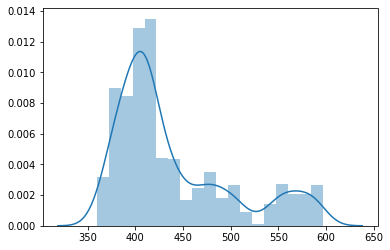

In [15]:
sns.distplot(xmalay)



In [16]:
from sklearn.model_selection import train_test_split
# xtr, xts, ytr, yts = train_test_split(df[['JCI']][:-forecast_out], df['prediction'][:-forecast_out], random_state=10)
xtrmalay, xtsmalay, ytrmalay, ytsmalay = train_test_split(xmalay, ymalay, random_state=5)
xtrmalay

array([[545.2760181 ],
       [396.56837099],
       [382.68435482],
       ...,
       [425.37576499],
       [549.23699595],
       [418.73518714]])

In [17]:
def evaluate(model, test_features, test_labels):
    vals = dict()
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    print('RMSE = {:0.4f}'.format(rmse))
    print('R2 Score = {:0.4f}.'.format(r2))
    vals['accuracy'] = accuracy
    vals['rmse'] = rmse
    vals['r2'] = r2
    
    return vals

In [18]:
lnr_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs':['int', None]
}
print(lnr_grid)

{'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'n_jobs': ['int', None]}


In [19]:
lnr = LinearRegression()
lnr_random = RandomizedSearchCV(estimator=lnr, param_distributions=lnr_grid, n_iter=100,
                               cv=5, verbose=2, random_state=41, n_jobs=-1)

lnr_random.fit(xtrmalay, ytrmalay)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  80 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': ['int', None],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=41, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [20]:
lnr_random.best_params_

{'normalize': True, 'n_jobs': 'int', 'fit_intercept': True, 'copy_X': True}

In [21]:
## LinearRegression with default hyperparameters

base_lnr = LinearRegression()
base_lnr.fit(xtrmalay, ytrmalay)
base_lnr_accuracy = evaluate(base_lnr, xtsmalay, ytsmalay)



Model Performance
Average Error: 2.4893 degrees.
Accuracy = 99.4284%.
RMSE = 3.6329
R2 Score = 0.9966.


In [22]:
## LinearRegression with default best hyperparameters

best_lnr = lnr_random.best_estimator_
best_lnr.fit(xtrmalay, ytrmalay)
best_lnr_accuracy = evaluate(best_lnr, xtrmalay, ytrmalay)

Model Performance
Average Error: 2.2651 degrees.
Accuracy = 99.4838%.
RMSE = 3.2432
R2 Score = 0.9972.


## Ridge

In [23]:
rdg_grid = {
    'alpha': np.arange(1,2,0.01),
    'fit_intercept': [True, False],
    'max_iter': [10,100,1000,10000,100000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
print(rdg_grid)

{'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]), 'fit_intercept': [True, False], 'max_iter': [10, 100, 1000, 10000, 100000], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


In [24]:
rdg = Ridge()
rdg_random = RandomizedSearchCV(estimator=rdg, param_distributions=rdg_grid, n_iter=100,
                               cv=5, verbose=2, random_state=41, n_jobs=-1)

rdg_random.fit(xtrmalay, ytrmalay)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,...
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]),
                                        'fit_intercept': [True, False],
                                        'max_iter': [10, 100, 1000, 10000,
                                                     1000

In [25]:
rdg_random.best_params_

{'solver': 'saga', 'max_iter': 1000, 'fit_intercept': True, 'alpha': 1.04}

In [26]:
## Ridge with default hyperparameter
base_rdg = Ridge()
base_rdg.fit(xtrmalay, ytrmalay)
base_rdg_accuracy = evaluate(base_rdg, xtrmalay, ytrmalay)

Model Performance
Average Error: 2.2651 degrees.
Accuracy = 99.4838%.
RMSE = 3.2432
R2 Score = 0.9972.


In [27]:
## Ridge with best hyperparameters

best_rdg = rdg_random.best_estimator_
best_rdg.fit(xtrmalay, ytrmalay)
best_rdg_accuracy = evaluate(best_rdg, xtrmalay, ytrmalay)

Model Performance
Average Error: 2.2645 degrees.
Accuracy = 99.4835%.
RMSE = 3.2555
R2 Score = 0.9972.


## Lasso

In [28]:
las_grid = {
    'alpha': np.arange(1,2,0.01),
    'fit_intercept': [True, False],
    'max_iter': [10,100,1000,10000,100000],
    'precompute': [True, False],
    'warm_start': [True, False],
    'random_state': np.arange(20,30,1),
    'selection': ['random', 'cyclic']
}
print(las_grid)

{'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]), 'fit_intercept': [True, False], 'max_iter': [10, 100, 1000, 10000, 100000], 'precompute': [True, False], 'warm_start': [True, False], 'random_state': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'selection': ['random', 'cyclic']}


In [29]:
las = Lasso()
las_random = RandomizedSearchCV(estimator=las, param_distributions=las_grid, n_iter=100,
                               cv=5, verbose=2, random_state=41, n_jobs=-1)

las_random.fit(xtrmalay, ytrmalay)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1...
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]),
                                        'fit_intercept': [True, False],
                                        'max_iter': [10, 100, 1000, 10000,
                                                     100000],
                                        'precompute': [True, False],
                                        'random_state'

In [30]:
las_random.best_params_

{'warm_start': False,
 'selection': 'cyclic',
 'random_state': 22,
 'precompute': False,
 'max_iter': 100,
 'fit_intercept': True,
 'alpha': 1.01}

In [31]:
## lasso with default hyperparameters

base_las = Lasso()
base_las.fit(xtrmalay, ytrmalay)
base_las_accuracy = evaluate(base_rdg, xtsmalay, ytsmalay)

Model Performance
Average Error: 2.4893 degrees.
Accuracy = 99.4284%.
RMSE = 3.6329
R2 Score = 0.9966.


In [32]:
## Lasso with best hyperparameters

best_las = las_random.best_estimator_
best_las.fit(xtrmalay, ytrmalay)
best_las_accuracy = evaluate(best_las, xtsmalay, ytsmalay)

Model Performance
Average Error: 2.4901 degrees.
Accuracy = 99.4282%.
RMSE = 3.6326
R2 Score = 0.9966.


## ElasticNet

In [33]:
elas_grid = {
    'alpha': np.arange(1,2,0.01),
    'l1_ratio': np.arange(0.1,1,0.01),
    'fit_intercept': [True, False],
    'precompute': [True, False],
    'max_iter': [10,100,1000,10000,100000],
    'warm_start': [True, False],
    'positive': [True, False],
    'random_state': np.arange(20,30,1),
    'selection': ['random', 'cyclic']
}
print(elas_grid)

{'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]), 'l1_ratio': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0

In [34]:
elas = ElasticNet()
elas_random = RandomizedSearchCV(estimator=elas, param_distributions=elas_grid, n_iter=100,
                               cv=5, verbose=2, random_state=41, n_jobs=-1)

elas_random.fit(xtrmalay, ytrmalay)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06,...
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
                                        'max_iter': [10, 100, 1000, 10000,
                                                     100000],
                                        'positive': [True, False],
                                        'precompute': [True, Fals

In [35]:
elas_random.best_params_

{'warm_start': True,
 'selection': 'cyclic',
 'random_state': 21,
 'precompute': False,
 'positive': False,
 'max_iter': 1000,
 'l1_ratio': 0.5499999999999998,
 'fit_intercept': True,
 'alpha': 1.0}

In [36]:
## elasticnet with default hyperparameters
base_elas = ElasticNet()
base_elas.fit(xtrmalay, ytrmalay)
base_elas_accuracy = evaluate(base_elas, xtsmalay, ytsmalay)

Model Performance
Average Error: 2.4901 degrees.
Accuracy = 99.4282%.
RMSE = 3.6326
R2 Score = 0.9966.


In [37]:
## elasticnet with best hyperparameters

best_elas = elas_random.best_estimator_
best_elas.fit(xtrmalay, ytrmalay)
best_elas_accuracy = evaluate(best_elas, xtsmalay, ytsmalay)

Model Performance
Average Error: 2.4901 degrees.
Accuracy = 99.4282%.
RMSE = 3.6326
R2 Score = 0.9966.


In [39]:

## LinearRegression with default hyperparameters
print('base linear:')
base_lnr = LinearRegression()
base_lnr.fit(xtrmalay, ytrmalay)
base_lnr_accuracy = evaluate(base_lnr, xtsmalay, ytsmalay)


## Ridge with default hyperparameter
print('base ridge:')
base_rdg = Ridge()
base_rdg.fit(xtrmalay, ytrmalay)
base_rdg_accuracy = evaluate(base_rdg, xtrmalay, ytrmalay)


## Lasso with best hyperparameters
print('best lasso:')
best_las = las_random.best_estimator_
best_las.fit(xtrmalay, ytrmalay)
best_las_accuracy = evaluate(best_las, xtsmalay, ytsmalay)


## elasticnet with best hyperparameters
print('best elasticnet:')
best_elas = elas_random.best_estimator_
best_elas.fit(xtrmalay, ytrmalay)
best_elas_accuracy = evaluate(best_elas, xtsmalay, ytsmalay)



base linear:
Model Performance
Average Error: 2.4893 degrees.
Accuracy = 99.4284%.
RMSE = 3.6329
R2 Score = 0.9966.
base ridge:
Model Performance
Average Error: 2.2651 degrees.
Accuracy = 99.4838%.
RMSE = 3.2432
R2 Score = 0.9972.
best lasso:
Model Performance
Average Error: 2.4901 degrees.
Accuracy = 99.4282%.
RMSE = 3.6326
R2 Score = 0.9966.
best elasticnet:
Model Performance
Average Error: 2.4901 degrees.
Accuracy = 99.4282%.
RMSE = 3.6326
R2 Score = 0.9966.


In [40]:
#create and train the linear regression model
ri = base_rdg
#train the model
# {'solver': 'saga', 'max_iter': 1000, 'fit_intercept': True, 'alpha': 1.04}
ri.fit(xtrmalay, ytrmalay)

import joblib
joblib.dump(ri,'regressionmalayi')

im = joblib.load('regressionmalayi')
im

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
ylrmalay = im.predict(xtsmalay)
dfmalaybaru = pd.DataFrame({ 'ymalay':ytsmalay ,'predictmalay': ylrmalay})
dfmalaybaru


,ymalay,predictmalay
0,419.878716,421.071016
1,402.569179,405.276064
2,592.415873,595.589363
3,445.518398,445.653527
4,408.259178,403.999265
5,402.999043,403.408037
6,392.243237,393.537048
7,470.894991,477.059301
8,483.251966,484.286024
9,500.855556,494.815455


In [42]:
dfkursmalay = df2[['Malaysia']]
dfkursmalay

dfkursmalay['predictkursmalay'] = dfkursmalay[['Malaysia']].shift(-forecast_out)

dfkursmalay

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Malaysia,predictkursmalay
0,3.2850,3.2850
1,3.2850,3.2835
2,3.2835,3.2830
3,3.2830,3.2710
4,3.2710,3.2750
5,3.2750,3.2680
6,3.2680,3.2600
7,3.2600,3.2860
8,3.2860,3.2960
9,3.2960,3.2960


In [43]:
xkursmalay = np.array(dfkursmalay.drop(['predictkursmalay'], axis=1))

xkursmalay
#remove the 'n' rows
xkursmalay = xkursmalay[:-forecast_out]
xkursmalay


array([[3.285 ],
       [3.285 ],
       [3.2835],
       ...,
       [4.135 ],
       [4.131 ],
       [4.126 ]])

In [44]:
ykursmalay = np.array(dfkursmalay['predictkursmalay'])

ykursmalay
#remove the 'n' rows
ykursmalay = ykursmalay[:-forecast_out]
ykursmalay


array([3.285 , 3.2835, 3.283 , ..., 4.131 , 4.126 , 4.1045])

In [45]:
from sklearn.model_selection import train_test_split

xtrkmalay, xtskmalay, ytrkmalay, ytskmalay = train_test_split(xkursmalay, ykursmalay, random_state=5)
xtrkmalay



array([[3.315 ],
       [4.205 ],
       [4.3042],
       ...,
       [4.085 ],
       [3.3355],
       [4.2615]])

In [46]:
lnr_random.fit(xtrkmalay, ytrkmalay)




Fitting 5 folds for each of 16 candidates, totalling 80 fits


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': ['int', None],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=41, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [47]:
lnr_random.best_params_

{'normalize': True, 'n_jobs': 'int', 'fit_intercept': True, 'copy_X': True}

In [48]:
## LinearRegression with default hyperparameters

base_lnr = LinearRegression()
base_lnr.fit(xtrkmalay, ytrkmalay)
base_lnr_accuracy = evaluate(base_lnr, xtskmalay, ytskmalay)

Model Performance
Average Error: 0.0104 degrees.
Accuracy = 99.7388%.
RMSE = 0.0172
R2 Score = 0.9976.


In [49]:
## LinearRegression with default best hyperparameters

best_lnr = lnr_random.best_estimator_
best_lnr.fit(xtrkmalay, ytrkmalay)
best_lnr_accuracy = evaluate(best_lnr, xtrkmalay, ytrkmalay)

Model Performance
Average Error: 0.0101 degrees.
Accuracy = 99.7424%.
RMSE = 0.0160
R2 Score = 0.9980.


## Ridge

In [50]:
rdg_random.fit(xtrkmalay, ytrkmalay)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,...
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]),
                                        'fit_intercept': [True, False],
                                        'max_iter': [10, 100, 1000, 10000,
                                                     1000

In [51]:
rdg_random.best_params_

{'solver': 'saga',
 'max_iter': 10,
 'fit_intercept': False,
 'alpha': 1.9400000000000008}

In [52]:
## Ridge with default hyperparameter
base_rdg = Ridge()
base_rdg.fit(xtrkmalay, ytrkmalay)
base_rdg_accuracy = evaluate(base_rdg, xtrkmalay, ytrkmalay)

Model Performance
Average Error: 0.0105 degrees.
Accuracy = 99.7306%.
RMSE = 0.0162
R2 Score = 0.9979.


In [53]:
## Ridge with best hyperparameters

best_rdg = rdg_random.best_estimator_
best_rdg.fit(xtrkmalay, ytrkmalay)
best_rdg_accuracy = evaluate(best_rdg, xtrkmalay, ytrkmalay)

Model Performance
Average Error: 0.0101 degrees.
Accuracy = 99.7417%.
RMSE = 0.0161
R2 Score = 0.9980.


## Lasso

In [54]:
las_random.fit(xtrkmalay, ytrkmalay)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1...
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]),
                                        'fit_intercept': [True, False],
                                        'max_iter': [10, 100, 1000, 10000,
                                                     100000],
                                        'precompute': [True, False],
                                        'random_state'

In [55]:
las_random.best_params_

{'warm_start': True,
 'selection': 'cyclic',
 'random_state': 23,
 'precompute': False,
 'max_iter': 100,
 'fit_intercept': False,
 'alpha': 1.07}

In [56]:
## lasso with default hyperparameters

base_las = Lasso()
base_las.fit(xtrkmalay, ytrkmalay)
base_las_accuracy = evaluate(base_rdg, xtskmalay, ytskmalay)

Model Performance
Average Error: 0.0109 degrees.
Accuracy = 99.7282%.
RMSE = 0.0173
R2 Score = 0.9976.


In [57]:
## Lasso with best hyperparameters

best_las = las_random.best_estimator_
best_las.fit(xtrkmalay, ytrkmalay)
best_las_accuracy = evaluate(best_las, xtskmalay, ytskmalay)

Model Performance
Average Error: 0.2701 degrees.
Accuracy = 93.2332%.
RMSE = 0.2716
R2 Score = 0.4117.


## Elastic

In [58]:
elas_random.fit(xtrkmalay, ytrkmalay)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06,...
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
                                        'max_iter': [10, 100, 1000, 10000,
                                                     100000],
                                        'positive': [True, False],
                                        'precompute': [True, Fals

In [59]:
elas_random.best_params_

{'warm_start': True,
 'selection': 'random',
 'random_state': 21,
 'precompute': True,
 'positive': False,
 'max_iter': 100,
 'l1_ratio': 0.5799999999999997,
 'fit_intercept': False,
 'alpha': 1.05}

In [60]:
## elasticnet with default hyperparameters
base_elas = ElasticNet()
base_elas.fit(xtrkmalay, ytrkmalay)
base_elas_accuracy = evaluate(base_elas, xtskmalay, ytskmalay)

Model Performance
Average Error: 0.2815 degrees.
Accuracy = 92.5109%.
RMSE = 0.3543
R2 Score = -0.0013.


In [61]:
## elasticnet with best hyperparameters

best_elas = elas_random.best_estimator_
best_elas.fit(xtrkmalay, ytrkmalay)
best_elas_accuracy = evaluate(best_elas, xtskmalay, ytskmalay)

Model Performance
Average Error: 0.2580 degrees.
Accuracy = 93.5354%.
RMSE = 0.2595
R2 Score = 0.4629.


In [67]:
## LinearRegression with best hyperparameters
print('best linear:')
best_lnr = lnr_random.best_estimator_
best_lnr.fit(xtrkmalay, ytrkmalay)
best_lnr_accuracy = evaluate(best_lnr, xtrkmalay, ytrkmalay)

## Ridge with best hyperparameters
print('best ridge:')
best_rdg = rdg_random.best_estimator_
best_rdg.fit(xtrkmalay, ytrkmalay)
best_rdg_accuracy = evaluate(best_rdg, xtrkmalay, ytrkmalay)


## lasso with default hyperparameters
print('base lasso:')
base_las = Lasso()
base_las.fit(xtrkmalay, ytrkmalay)
base_las_accuracy = evaluate(base_rdg, xtskmalay, ytskmalay)


## elasticnet with best hyperparameters
print('best elastic:')
best_elas = elas_random.best_estimator_
best_elas.fit(xtrkmalay, ytrkmalay)
best_elas_accuracy = evaluate(best_elas, xtskmalay, ytskmalay)


best linear:
Model Performance
Average Error: 0.0101 degrees.
Accuracy = 99.7424%.
RMSE = 0.0160
R2 Score = 0.9980.
best ridge:
Model Performance
Average Error: 0.0104 degrees.
Accuracy = 99.7364%.
RMSE = 0.0161
R2 Score = 0.9980.
base lasso:
Model Performance
Average Error: 0.0109 degrees.
Accuracy = 99.7282%.
RMSE = 0.0173
R2 Score = 0.9976.
best elastic:
Model Performance
Average Error: 0.2580 degrees.
Accuracy = 93.5354%.
RMSE = 0.2595
R2 Score = 0.4629.


In [68]:
#create and train the linear regression model
lr = best_lnr

# {'solver': 'auto', 'max_iter': 10000, 'fit_intercept': False, 'alpha': 1.0}
#train the model {'normalize': True, 'fit_intercept': False}
lr.fit(xtrkmalay, ytrkmalay)

import joblib
joblib.dump(lr,'regressionmalay')

jm = joblib.load('regressionmalay')
jm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs='int', normalize=True)

In [72]:
kmalay = (input('kursmalay: ')).split(',')
kumalay = []
for i in kmalay:
    a  = float(i)
    kumalay.append(a)
kumalay = np.array(kumalay)
if kumalay.shape[0] == 1:
    kumalay = kumalay.reshape(1,1)
else:
    kumalay = np.array(kumalay).reshape(-1,1)

kumalay

kursmalay: 4


array([[4.]])

In [73]:
kursmalay = jm.predict(kumalay)

kursmalay

array([3.99982702])

In [74]:
x = (input('insertmalay: ')).split(',')

q = []
for i in range(len(x)):
    c = float(x[i])
    q.append(c)
q = np.array(q)

if len(q) == len(kursmalay):
    divide = q / kursmalay
    print(divide)
    if divide.shape[0] == 1:
        divide = divide.reshape(1,1)
        ylr = im.predict(divide)
        ylr
        ylrcon = ylr * kursmalay
        ylrcon
    else:
        divide = np.array(divide).reshape(-1,1)
        ylr = im.predict(divide)
        ylr
        ylrcon = ylr * kursmalay
        ylrcon

else:
#     print('length should be the same')
    divide = 'length should be the same'
    ylr = divide
    ylrcon = divide
#     if divide.shape[0] == 1:
#         divide = divide.reshape(1,1)
#     else:
#         divide = np.array(divide).reshape(-1,1)
ylrcon

insertmalay: 1800
[450.01946117]


array([1799.9353007])